# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Data Cleaning and Visualization of Badminton Data

This notebook demonstrates the process of cleaning and visualizing badminton data using Python and pandas. The dataset consists of two CSV files: `badmintondata.csv` and `badmintondata2.csv`. The goal is to combine the datasets, clean the data, and generate a 3D scatterplot for visualization.

### Data Loading and Cleaning

- The first step is to load the data from the CSV files using pandas' `read_csv` function.
- Missing values are handled by dropping rows with missing values using the `dropna` method.
- Outliers are identified and removed using the z-score method. Rows with z-scores exceeding a certain threshold are considered outliers and filtered out.
- Inconsistencies in the data, such as decimal separators, are addressed by replacing commas with periods and converting the data to float format.

### Data Combination

- The two datasets, `badmintondata.csv` and `badmintondata2.csv`, are combined into a single dataframe using pandas' `concat` function.

### Data Visualization

- A 3D scatterplot is generated to visualize the badminton data.
- Two scatterplots are shown side by side:
  - Cleaned Combined Dataset: The dataset after cleaning, with outliers removed and inconsistencies addressed.
  - Uncleaned Combined Dataset: The dataset before cleaning, with outliers and inconsistencies present.
- The scatterplots provide insights into the distribution and patterns of the data in three-dimensional space.


Number of rows before cleaning: 39158
Number of rows after cleaning: 39158


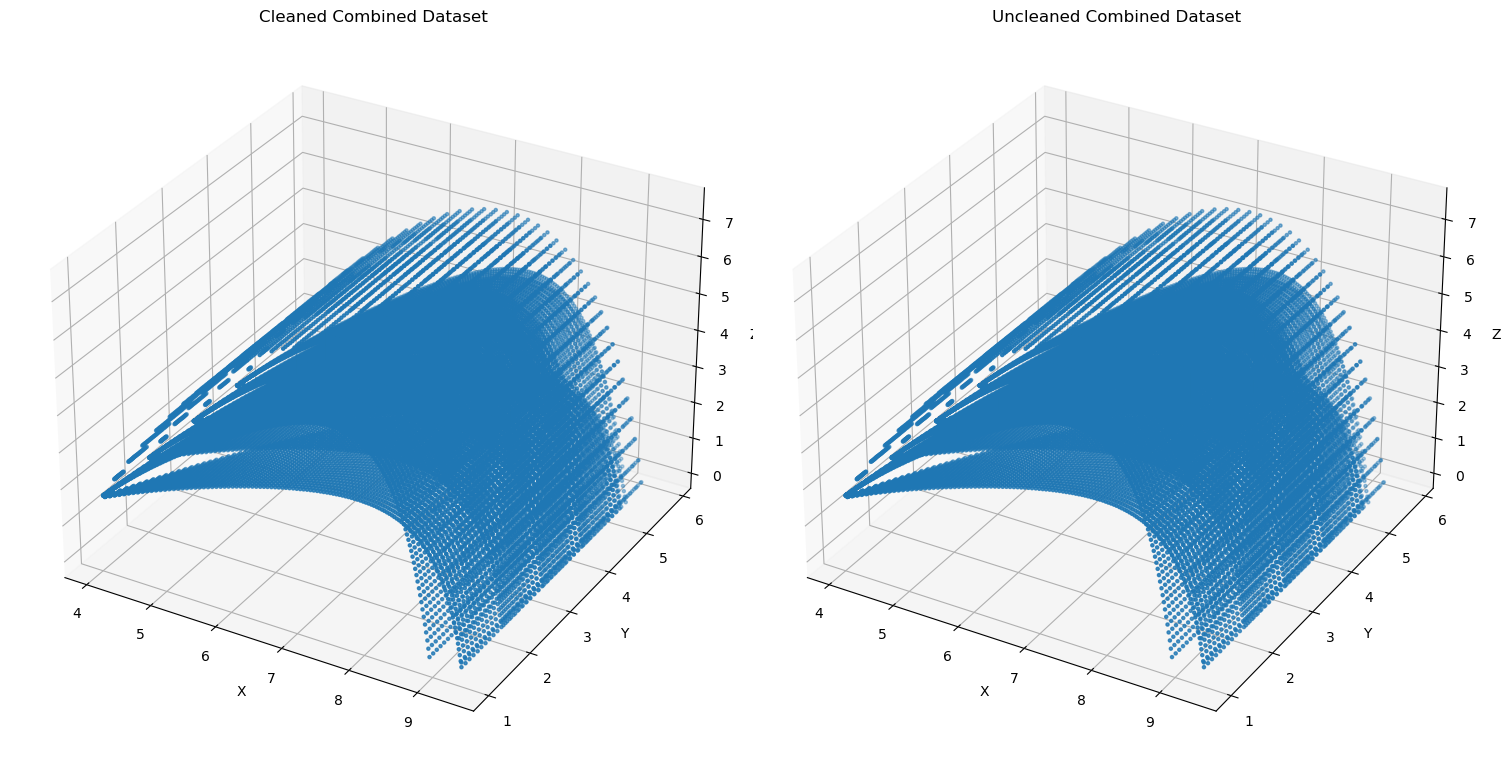

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the first dataset
df_combined1 = pd.read_csv('Y_axis_transformed.csv')

# Count rows before cleaning
rows_before_cleaning = df_combined1.shape[0]

# Handling missing values
df_combined1 = df_combined1.dropna()  # Drop rows with missing values

# Handling outliers (Using z-score)
z_scores_combined = (df_combined1 - df_combined1.mean()) / df_combined1.std()  # Calculate z-scores
threshold = 3  # Set a threshold for outliers
outliers_combined = (z_scores_combined.abs() > threshold).any(axis=1)  # Find rows with outliers
df_combined_cleaned1 = df_combined1[~outliers_combined].copy()  # Filter out rows with outliers

# Identify consecutive rows of all zeros
mask = (df_combined1 == 0).all(axis=1)
groups = mask.cumsum()

# Filter out consecutive rows of all zeros
df_combined_cleaned1 = df_combined1[~mask]
# df_combined_cleaned.to_csv('cleaned_dataset.csv', index = False)

# Count rows after cleaning
rows_after_cleaning = df_combined_cleaned1.shape[0]

print("Number of rows before cleaning:", rows_before_cleaning)
print("Number of rows after cleaning:", rows_after_cleaning)

# Generate scatterplot for the cleaned combined dataset
fig, axes = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': '3d'})

# Cleaned Combined Dataset
axes[0].scatter(df_combined_cleaned1['SHUTTLECOCK POSITIION IN AIR(X) metres'], df_combined_cleaned1['SHUTTLECOCK POSITIION IN AIR(Y) metres'], df_combined_cleaned1['SHUTTLECOCK POSITIION IN AIR(Z) metres'], s=5)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_zlabel('Z')
axes[0].set_title('Cleaned Combined Dataset')
axes[0].grid(True)

# Uncleaned Combined Dataset
axes[1].scatter(df_combined1['SHUTTLECOCK POSITIION IN AIR(X) metres'], df_combined1['SHUTTLECOCK POSITIION IN AIR(Y) metres'], df_combined1['SHUTTLECOCK POSITIION IN AIR(Z) metres'], s=5)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_zlabel('Z')
axes[1].set_title('Uncleaned Combined Dataset')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Number of rows before cleaning: 39158
Number of rows after cleaning: 39158


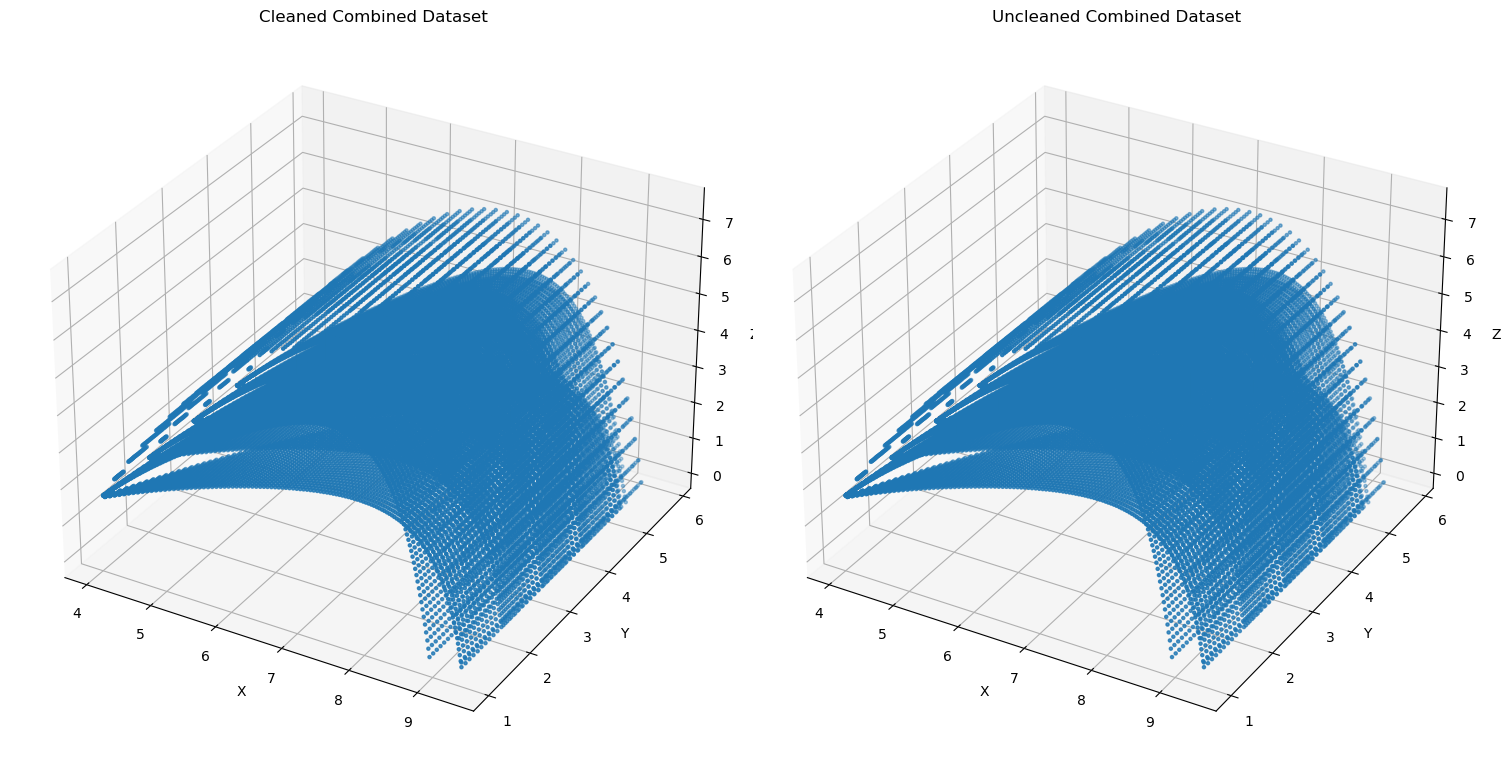

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the first dataset
df_combined2 = pd.read_csv('Y_axis_transformed.csv')

# Count rows before cleaning
rows_before_cleaning = df_combined2.shape[0]

# Handling missing values
df_combined2 = df_combined2.dropna()  # Drop rows with missing values

# Handling outliers (Using z-score)
z_scores_combined = (df_combined2 - df_combined2.mean()) / df_combined2.std()  # Calculate z-scores
threshold = 3  # Set a threshold for outliers
outliers_combined = (z_scores_combined.abs() > threshold).any(axis=1)  # Find rows with outliers
df_combined_cleaned2 = df_combined2[~outliers_combined].copy()  # Filter out rows with outliers

# Identify consecutive rows of all zeros
mask = (df_combined2 == 0).all(axis=1)
groups = mask.cumsum()

# Filter out consecutive rows of all zeros
df_combined_cleaned2 = df_combined2[~mask]
# df_combined_cleaned.to_csv('cleaned_dataset.csv', index = False)

# Count rows after cleaning
rows_after_cleaning = df_combined_cleaned2.shape[0]

print("Number of rows before cleaning:", rows_before_cleaning)
print("Number of rows after cleaning:", rows_after_cleaning)

# Generate scatterplot for the cleaned combined dataset
fig, axes = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': '3d'})

# Cleaned Combined Dataset
axes[0].scatter(df_combined_cleaned2['SHUTTLECOCK POSITIION IN AIR(X) metres'], df_combined_cleaned2['SHUTTLECOCK POSITIION IN AIR(Y) metres'], df_combined_cleaned2['SHUTTLECOCK POSITIION IN AIR(Z) metres'], s=5)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_zlabel('Z')
axes[0].set_title('Cleaned Combined Dataset')
axes[0].grid(True)

# Uncleaned Combined Dataset
axes[1].scatter(df_combined2['SHUTTLECOCK POSITIION IN AIR(X) metres'], df_combined2['SHUTTLECOCK POSITIION IN AIR(Y) metres'], df_combined2['SHUTTLECOCK POSITIION IN AIR(Z) metres'], s=5)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_zlabel('Z')
axes[1].set_title('Uncleaned Combined Dataset')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [4]:
# Group the data before each group of zeros
grouped_df = df_combined_cleaned2.groupby(groups)
print(df_combined_cleaned2.loc[0])
train_column = ["Principle Component 1","Principle Component 2", "Principle Component 3" , "SHUTTLECOCK POSITIION IN AIR(Z) metres"]
# Split the groups into testing set and sample set (split into a testing set and a sample set using a 70:30 ratio)
train_groups, test_groups = train_test_split(df_combined_cleaned1, test_size=0.3, random_state=42)
X_train_for_x = train_groups[train_column]
y_train_for_x = train_groups["SHUTTLECOCK POSITIION IN AIR(X) metres"]

train_groups2, test_groups2 = train_test_split(df_combined_cleaned2, test_size=0.3, random_state=42)
X_train_for_y= train_groups[train_column]
y_train_for_y = train_groups["SHUTTLECOCK POSITIION IN AIR(Y) metres"]


Principle Component 1                    -0.509748
Principle Component 2                     0.160229
Principle Component 3                     2.541547
SHUTTLECOCK POSITIION IN AIR(X) metres    4.075543
SHUTTLECOCK POSITIION IN AIR(Y) metres    1.000000
SHUTTLECOCK POSITIION IN AIR(Z) metres    1.662912
Name: 0, dtype: float64


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
# # Create polynomial features
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train)

# Train regression models for each target variable
model1 = LinearRegression()
model1.fit(X_train_for_x, y_train_for_x)
pred1 = model1.predict(X_train_for_x)
mse1 = mean_squared_error(y_train_for_x, pred1)
r21 = r2_score(y_train_for_x, pred1)
mae1= mean_absolute_error(y_train_for_x, pred1)
print("R square for X:",r21)
print("RMSE for X :", mse1)
print("MAE for X:", mae1)


model2 = LinearRegression()
model2.fit(X_train_for_y, y_train_for_y)
pred2 = model2.predict(X_train_for_y)
mse2 = mean_squared_error(y_train_for_y, pred2)
r22 = r2_score(y_train_for_y, pred2)
mae2= mean_absolute_error(y_train_for_y, pred2)
print("R square for X:",r22)
print("RMSE for X :", mse2)
print("MAE for X:", mae2)


R square for X: 0.411447206781009
RMSE for X : 1.3440636545864824
MAE for X: 0.9178298413789265
R square for X: 0.3727060460660141
RMSE for X : 0.764424411704945
MAE for X: 0.7081965723251934


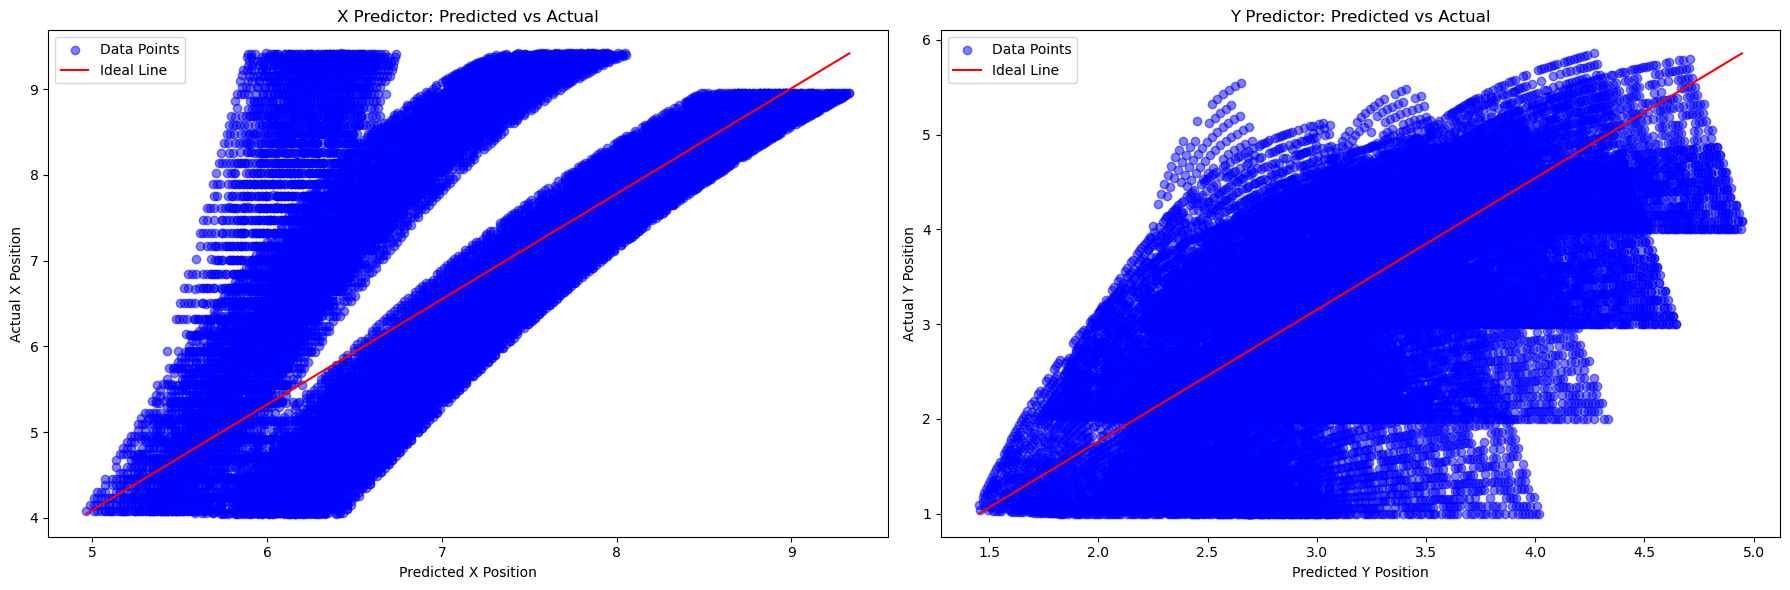

In [7]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Visualize predicted vs actual values for X predictor
axes[0].scatter(pred1, y_train_for_x, color='blue', alpha=0.5, label='Data Points')
axes[0].plot([min(pred1), max(pred1)], [min(y_train_for_x), max(y_train_for_x)], color='red', label='Ideal Line')
axes[0].set_xlabel('Predicted X Position')
axes[0].set_ylabel('Actual X Position')
axes[0].set_title('X Predictor: Predicted vs Actual')
axes[0].legend()

# Visualize predicted vs actual values for Y predictor
axes[1].scatter(pred2, y_train_for_y, color='blue', alpha=0.5, label='Data Points')
axes[1].plot([min(pred2), max(pred2)], [min(y_train_for_y), max(y_train_for_y)], color='red', label='Ideal Line')
axes[1].set_xlabel('Predicted Y Position')
axes[1].set_ylabel('Actual Y Position')
axes[1].set_title('Y Predictor: Predicted vs Actual')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


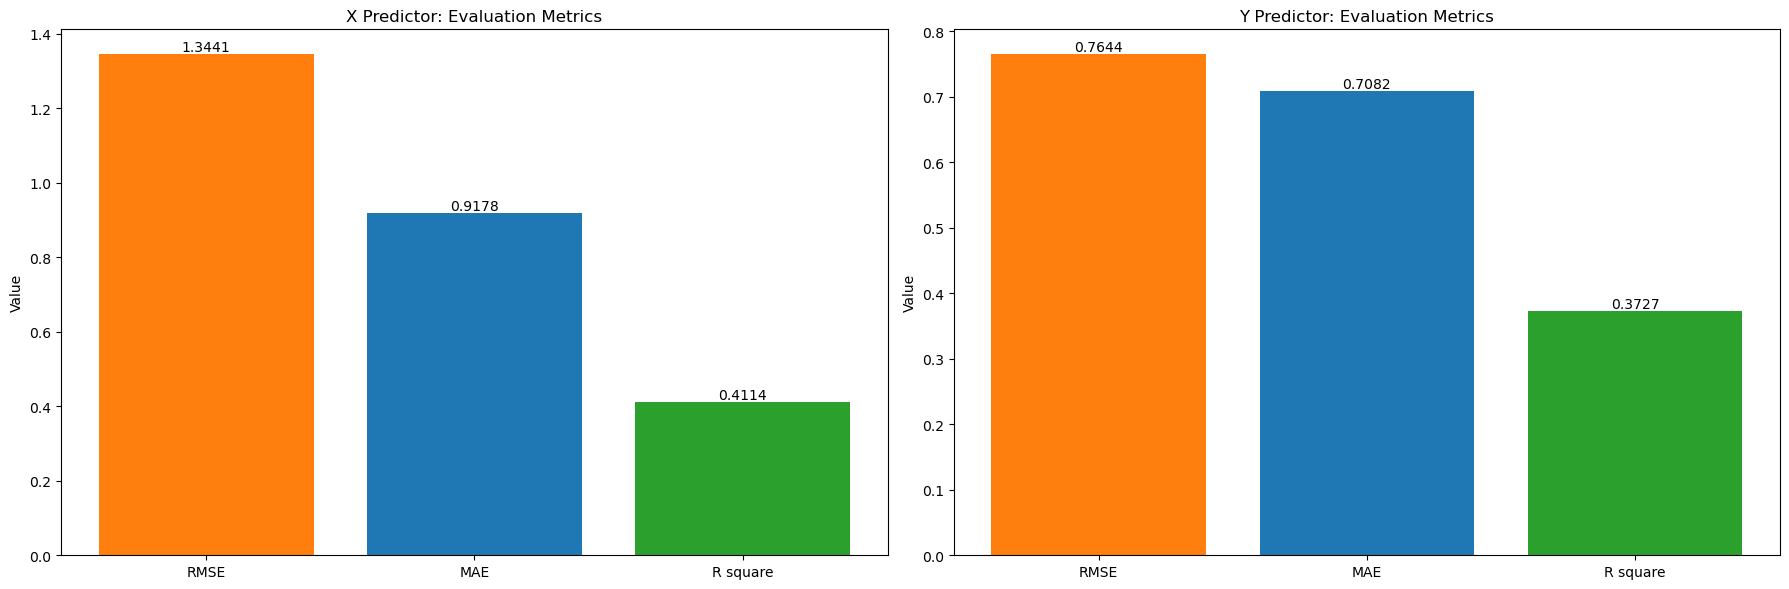

In [9]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Evaluation metric names
metrics = ['RMSE', 'MAE', 'R square']


# Evaluation metric values for X predictor
values_x = [mse1, mae1, r21]

# Evaluation metric values for Y predictor
values_y = [mse2, mae2, r22]

# Colors for the bars
colors = ['#FF7F0E', '#1F77B4', '#2CA02C']


# Visualize evaluation metrics for X predictor
axes[0].bar(metrics, values_x, color=colors)
axes[0].set_title('X Predictor: Evaluation Metrics')
axes[0].set_ylabel('Value')

# Add data labels to the bars in X predictor subplot
for i, v in enumerate(values_x):
    axes[0].text(i, v, f"{v:.4f}", ha='center', va='bottom')

# Visualize evaluation metrics for Y predictor
axes[1].bar(metrics, values_y, color=colors)
axes[1].set_title('Y Predictor: Evaluation Metrics')
axes[1].set_ylabel('Value')

# Add data labels to the bars in Y predictor subplot
for i, v in enumerate(values_y):
    axes[1].text(i, v, f"{v:.4f}", ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()
